In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=sns.load_dataset('titanic')

In [3]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df=data.copy()

In [5]:
df=df.drop(['pclass','adult_male', 'embark_town', 'alive'], axis=1)

In [6]:
df.head()

,survived,sex,age,sibsp,parch,fare,embarked,class,who,deck,alone
0,0,male,22.0,1,0,7.2500,S,Third,man,NaN,False
1,1,female,38.0,1,0,71.2833,C,First,woman,C,False
2,1,female,26.0,0,0,7.9250,S,Third,woman,NaN,True
3,1,female,35.0,1,0,53.1000,S,First,woman,C,False
4,0,male,35.0,0,0,8.0500,S,Third,man,NaN,True


In [7]:
df.duplicated().sum()

107

In [8]:
df=df.drop_duplicates()

In [9]:
df.shape

(784, 11)

In [10]:
df.isnull().sum()

survived      0
sex           0
age         106
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
deck        582
alone         0
dtype: int64

In [11]:
imputer=SimpleImputer(missing_values=np.nan)
df.iloc[:,2:3]=imputer.fit_transform(df.iloc[:,2:3])

In [12]:
df.drop(['deck'], axis=1, inplace=True)

In [13]:
df=df.dropna(subset=['embarked'])

In [14]:
df.isna().sum()

survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
class       0
who         0
alone       0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  782 non-null    int64   
 1   sex       782 non-null    object  
 2   age       782 non-null    float64 
 3   sibsp     782 non-null    int64   
 4   parch     782 non-null    int64   
 5   fare      782 non-null    float64 
 6   embarked  782 non-null    object  
 7   class     782 non-null    category
 8   who       782 non-null    object  
 9   alone     782 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(3), object(3)
memory usage: 56.6+ KB


In [16]:
df['survived']=df['survived'].astype('category')
df['age']=df['age'].astype('int64')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  782 non-null    category
 1   sex       782 non-null    object  
 2   age       782 non-null    int64   
 3   sibsp     782 non-null    int64   
 4   parch     782 non-null    int64   
 5   fare      782 non-null    float64 
 6   embarked  782 non-null    object  
 7   class     782 non-null    category
 8   who       782 non-null    object  
 9   alone     782 non-null    bool    
dtypes: bool(1), category(2), float64(1), int64(3), object(3)
memory usage: 51.4+ KB


In [18]:
df.head()

,survived,sex,age,sibsp,parch,fare,embarked,class,who,alone
0,0,male,22,1,0,7.2500,S,Third,man,False
1,1,female,38,1,0,71.2833,C,First,woman,False
2,1,female,26,0,0,7.9250,S,Third,woman,True
3,1,female,35,1,0,53.1000,S,First,woman,False
4,0,male,35,0,0,8.0500,S,Third,man,True


### Univariate Analysis

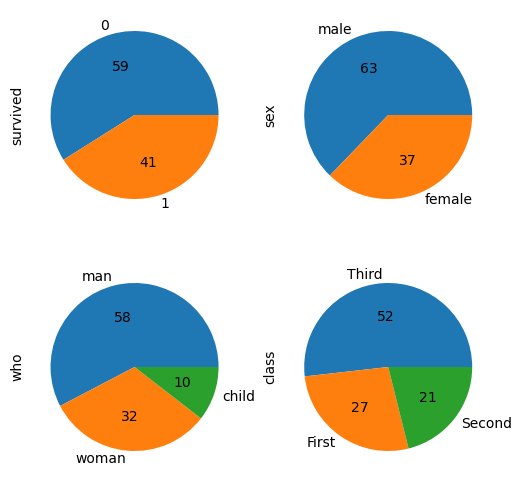

In [19]:
plt.figure(figsize=(6,6))
plt.subplot(2,2,1)
df['survived'].value_counts().plot(kind='pie', autopct='%.0f')
plt.subplot(2,2,2)
df['sex'].value_counts().plot(kind='pie', autopct='%.0f')
plt.subplot(2,2,3)
df['who'].value_counts().plot(kind='pie', autopct='%.0f')
plt.subplot(2,2,4)
df['class'].value_counts().plot(kind='pie', autopct='%.0f')
plt.show()

<Axes: xlabel='embarked', ylabel='count'>

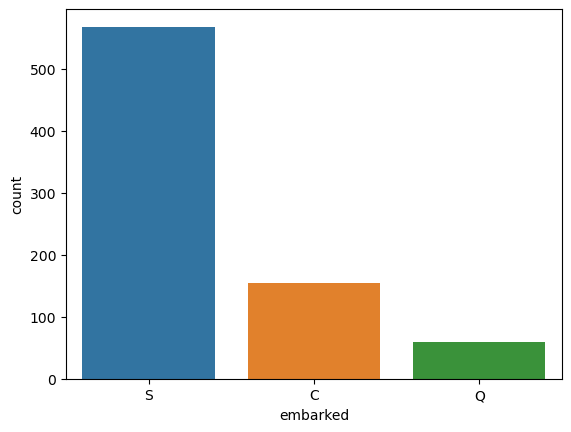

In [20]:
sns.countplot(df, x='embarked')

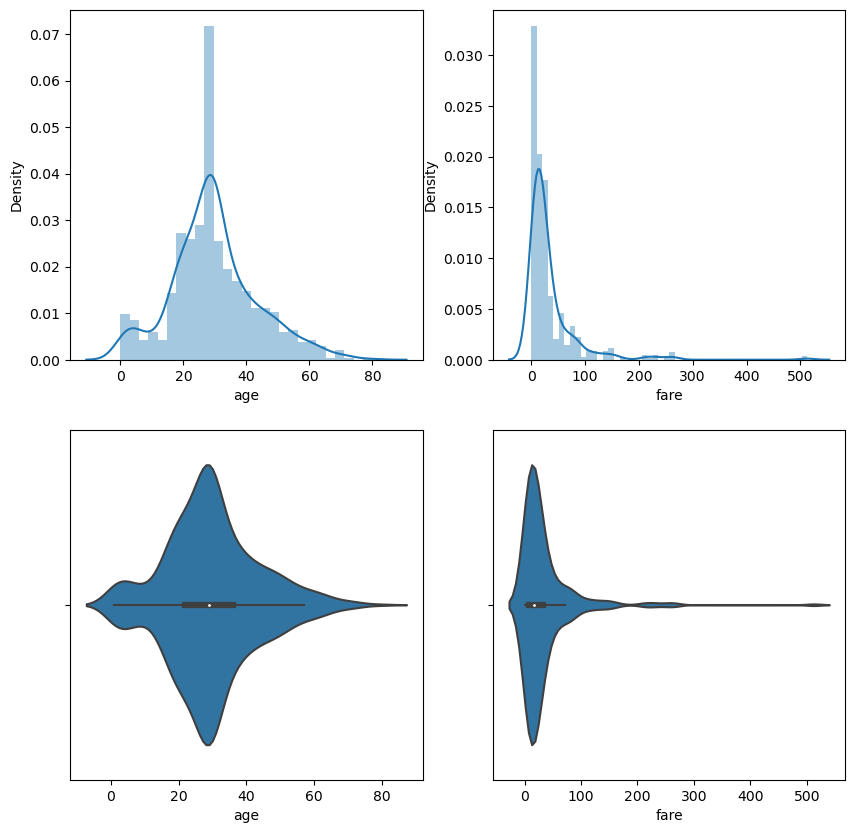

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['age'])
plt.subplot(2,2,2)
sns.distplot(df['fare'])
plt.subplot(2,2,3)
sns.violinplot(df, x='age')
plt.subplot(2,2,4)
sns.violinplot(df, x='fare')
plt.show()

### Multivariate Analysis

In [22]:
df.head()

,survived,sex,age,sibsp,parch,fare,embarked,class,who,alone
0,0,male,22,1,0,7.2500,S,Third,man,False
1,1,female,38,1,0,71.2833,C,First,woman,False
2,1,female,26,0,0,7.9250,S,Third,woman,True
3,1,female,35,1,0,53.1000,S,First,woman,False
4,0,male,35,0,0,8.0500,S,Third,man,True


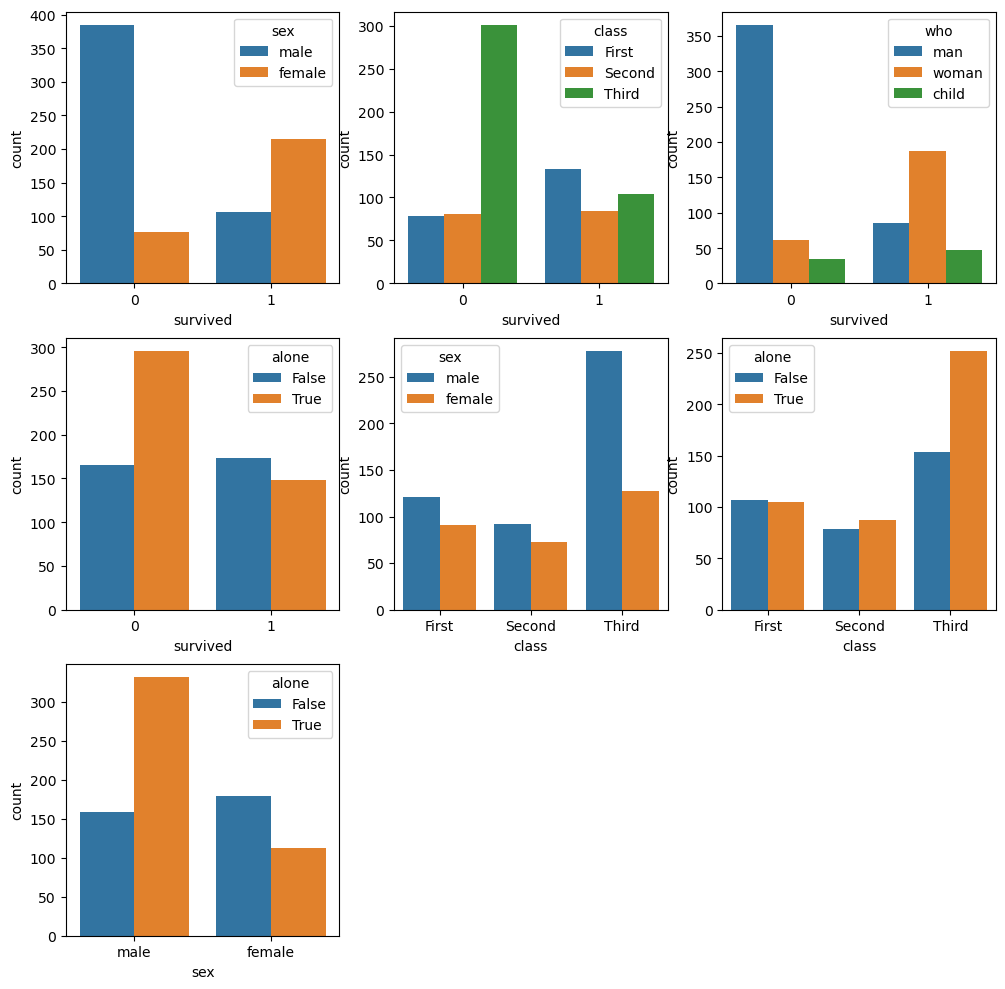

In [23]:
plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
sns.countplot(df, x='survived', hue='sex')
plt.subplot(3,3,2)
sns.countplot(df, x='survived', hue='class')
plt.subplot(3,3,3)
sns.countplot(df, x='survived', hue='who')
plt.subplot(3,3,4)
sns.countplot(df, x='survived', hue='alone')
plt.subplot(3,3,5)
sns.countplot(df, x='class', hue='sex')
plt.subplot(3,3,6)
sns.countplot(df, x='class', hue='alone')
plt.subplot(3,3,7)
sns.countplot(df, x='sex', hue='alone')
plt.show()

<Axes: xlabel='survived', ylabel='age'>

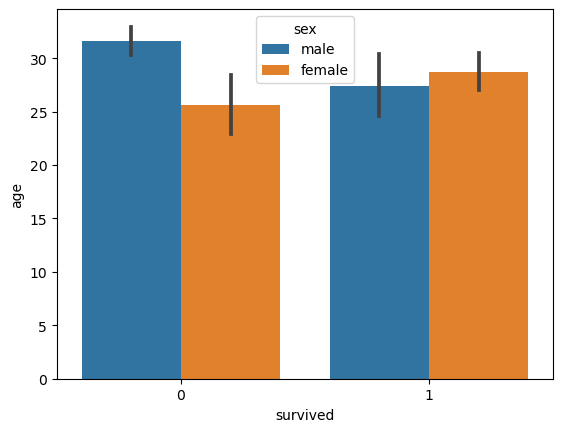

In [24]:
sns.barplot(df, x='survived', y='age', hue='sex')

<Axes: xlabel='survived', ylabel='age'>

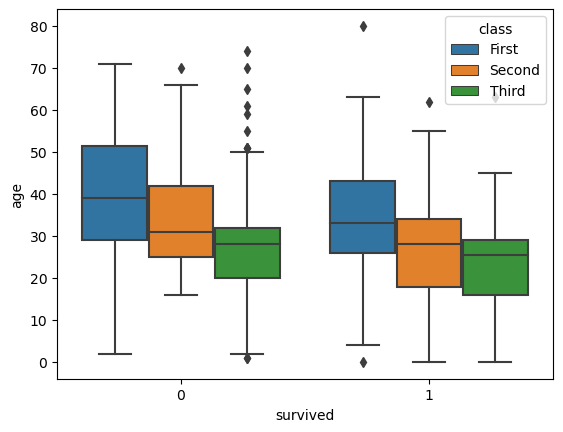

In [25]:
sns.boxplot(df, x='survived', y='age', hue='class')

<Axes: xlabel='class', ylabel='fare'>

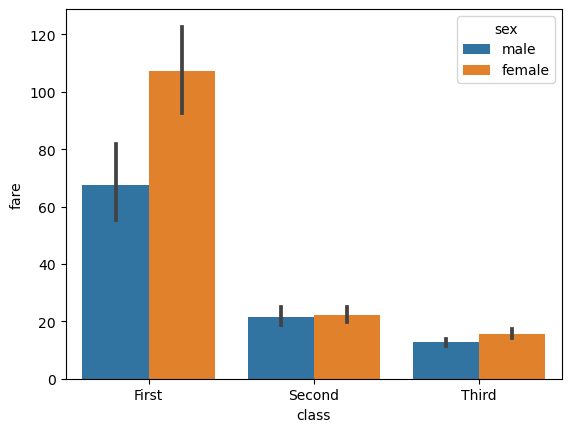

In [26]:
sns.barplot(df, x='class', y='fare', hue='sex')

In [27]:
df=df.drop(['sibsp', 'parch'], axis=1)

In [28]:
df.corr()

,age,fare,alone
age,1.000000,0.087722,0.191517
fare,0.087722,1.000000,-0.249035
alone,0.191517,-0.249035,1.000000


### Removing Outliers

In [29]:
df.head()

,survived,sex,age,fare,embarked,class,who,alone
0,0,male,22,7.2500,S,Third,man,False
1,1,female,38,71.2833,C,First,woman,False
2,1,female,26,7.9250,S,Third,woman,True
3,1,female,35,53.1000,S,First,woman,False
4,0,male,35,8.0500,S,Third,man,True


In [30]:
df['alone']=df['alone'].astype('category')

<Axes: >

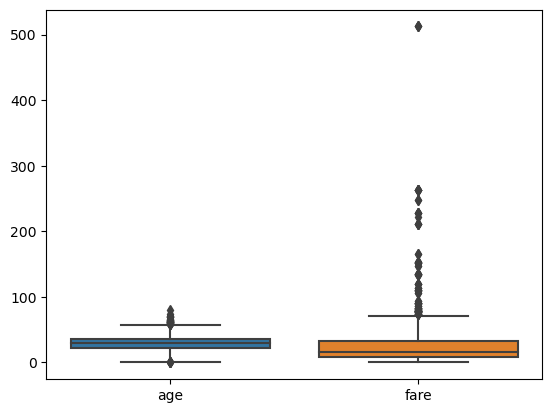

In [31]:
sns.boxplot(df)

<Axes: xlabel='fare', ylabel='Density'>

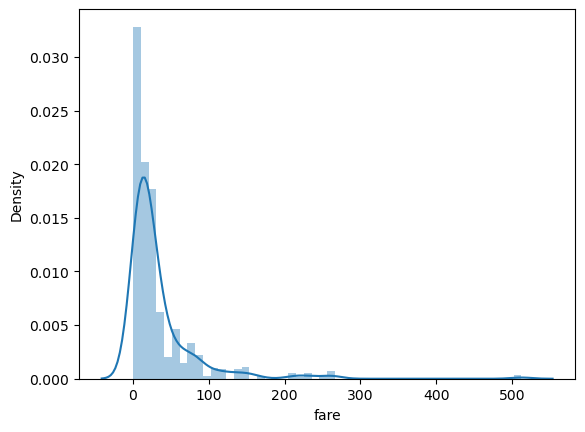

In [32]:
sns.distplot(df['fare'])

In [33]:
df['fare'].describe()

count    782.000000
mean      34.595913
std       52.176458
min        0.000000
25%        8.050000
50%       15.875000
75%       33.375000
max      512.329200
Name: fare, dtype: float64

In [34]:
iqr=33.375-8.05
min=8.05-1.5*iqr
max=33.375+1.5*iqr

In [35]:
max

71.3625

In [36]:
df[(df['fare']< min) | (df['fare']>max)].shape

(100, 8)

In [37]:
df.shape

(782, 8)

In [38]:
df['fare']= np.where(df['fare']< min, min, np.where (df['fare']>max, max, df['fare']))

In [39]:
df.shape

(782, 8)

<Axes: >

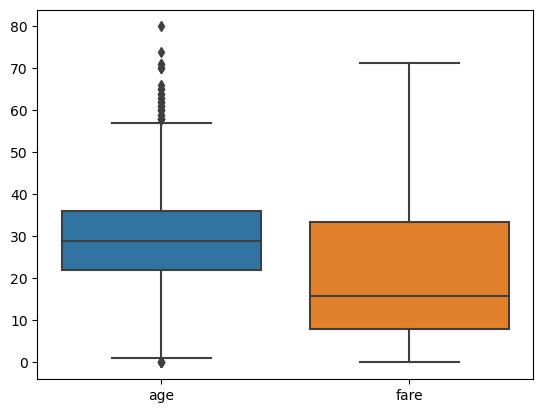

In [40]:
sns.boxplot(df)

### Scaling

In [41]:
df.head()

,survived,sex,age,fare,embarked,class,who,alone
0,0,male,22,7.2500,S,Third,man,False
1,1,female,38,71.2833,C,First,woman,False
2,1,female,26,7.9250,S,Third,woman,True
3,1,female,35,53.1000,S,First,woman,False
4,0,male,35,8.0500,S,Third,man,True


In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df.iloc[:,2:4]=scaler.fit_transform(df.iloc[:,2:4])

In [43]:
df.head()

,survived,sex,age,fare,embarked,class,who,alone
0,0,male,0.2750,0.101594,S,Third,man,False
1,1,female,0.4750,0.998890,C,First,woman,False
2,1,female,0.3250,0.111053,S,Third,woman,True
3,1,female,0.4375,0.744088,S,First,woman,False
4,0,male,0.4375,0.112804,S,Third,man,True


### Model

In [44]:
df=pd.get_dummies(df, columns=['sex','embarked','class','who','alone'])

In [45]:
df.head()

,survived,age,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,alone_False,alone_True
0,0,0.2750,0.101594,0,1,0,0,1,0,0,1,0,1,0,1,0
1,1,0.4750,0.998890,1,0,1,0,0,1,0,0,0,0,1,1,0
2,1,0.3250,0.111053,1,0,0,0,1,0,0,1,0,0,1,0,1
3,1,0.4375,0.744088,1,0,0,0,1,1,0,0,0,0,1,1,0
4,0,0.4375,0.112804,0,1,0,0,1,0,0,1,0,1,0,0,1


In [46]:
df=df.drop(['sex_female','alone_False'], axis=1)
df.head()

,survived,age,fare,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,alone_True
0,0,0.2750,0.101594,1,0,0,1,0,0,1,0,1,0,0
1,1,0.4750,0.998890,0,1,0,0,1,0,0,0,0,1,0
2,1,0.3250,0.111053,0,0,0,1,0,0,1,0,0,1,1
3,1,0.4375,0.744088,0,0,0,1,1,0,0,0,0,1,0
4,0,0.4375,0.112804,1,0,0,1,0,0,1,0,1,0,1


In [47]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.3, random_state=0)

In [49]:
x_test.shape

(235, 13)

In [50]:
df=df.drop(['sex_male'], axis=1)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      782 non-null    category
 1   age           782 non-null    float64 
 2   fare          782 non-null    float64 
 3   embarked_C    782 non-null    uint8   
 4   embarked_Q    782 non-null    uint8   
 5   embarked_S    782 non-null    uint8   
 6   class_First   782 non-null    uint8   
 7   class_Second  782 non-null    uint8   
 8   class_Third   782 non-null    uint8   
 9   who_child     782 non-null    uint8   
 10  who_man       782 non-null    uint8   
 11  who_woman     782 non-null    uint8   
 12  alone_True    782 non-null    uint8   
dtypes: category(1), float64(2), uint8(10)
memory usage: 43.0 KB


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      782 non-null    category
 1   age           782 non-null    float64 
 2   fare          782 non-null    float64 
 3   embarked_C    782 non-null    uint8   
 4   embarked_Q    782 non-null    uint8   
 5   embarked_S    782 non-null    uint8   
 6   class_First   782 non-null    uint8   
 7   class_Second  782 non-null    uint8   
 8   class_Third   782 non-null    uint8   
 9   who_child     782 non-null    uint8   
 10  who_man       782 non-null    uint8   
 11  who_woman     782 non-null    uint8   
 12  alone_True    782 non-null    uint8   
dtypes: category(1), float64(2), uint8(10)
memory usage: 43.0 KB


In [53]:
from sklearn.feature_selection import chi2, SelectKBest
best=SelectKBest(score_func=chi2, k=5)
best.fit(X,Y)

SelectKBest(k=5, score_func=<function chi2 at 0x000002A4633704C0>)

In [54]:
scores=pd.DataFrame(best.scores_)
col=pd.DataFrame(df.columns)
features=pd.concat([col,scores], axis=1)
features.columns=['Feature','Score']
features=features.sort_values(by='Score', ascending=False)
features

,Feature,Score
11,who_woman,122.143803
10,who_man,91.865431
2,fare,76.837752
6,class_First,41.205255
8,class_Third,39.535445
1,age,18.768984
3,embarked_C,18.546000
12,alone_True,10.921735
9,who_child,10.363377
7,class_Second,6.629628


<Axes: xlabel='Feature', ylabel='Score'>

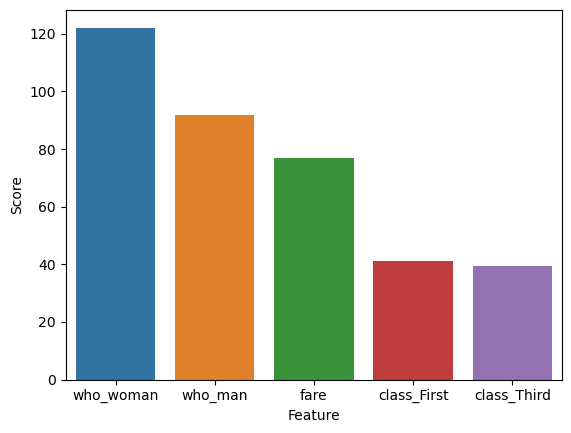

In [55]:
sns.barplot(features.head(), x='Feature', y='Score')

In [56]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [57]:
pred=lr.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc=accuracy_score(pred, y_test)
acc

0.7574468085106383

In [59]:
print(confusion_matrix(pred, y_test))

[[99 30]
 [27 79]]


In [60]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train, y_train)

SVC()

In [61]:
model.predict(x_test)
acc=accuracy_score(y_test,pred)
acc

0.7574468085106383

In [62]:
score=model.score(x_test, y_test)
score

0.7872340425531915

In [63]:
print(confusion_matrix(pred, y_test))

[[99 30]
 [27 79]]


In [64]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [65]:
pred=model.predict(x_test)
acc=accuracy_score(pred, y_test)
acc

0.7617021276595745

In [66]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [67]:
pred=model.predict(x_test)
acc=accuracy_score(pred, y_test)
acc

0.7702127659574468

In [68]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [69]:
pred=model.predict(x_test)
acc=accuracy_score(pred, y_test)
acc

0.7489361702127659

In [70]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(15)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [71]:
pred=model.predict(x_test)
acc=accuracy_score(pred, y_test)
acc

0.7872340425531915